# Task 2

# Titanic Classification

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Dataset

In [2]:
train_df = pd.read_csv('trainp.csv')
test_df = pd.read_csv('test.csv')

# Basic Inspections on the Dataset

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Describing the Dataset

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Checking the Datatypes of the dataset

In [9]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Analysis

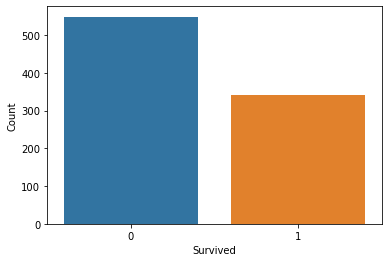

In [11]:
sns.countplot(x='Survived',data=train_df)
plt.ylabel('Count')
plt.show()

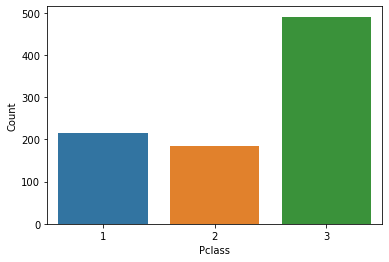

In [12]:
sns.countplot(x='Pclass',data=train_df)
plt.ylabel('Count')
plt.show()

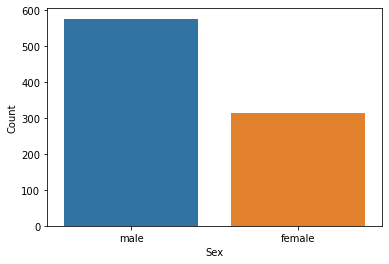

In [13]:
sns.countplot(x='Sex',data=train_df)
plt.ylabel('Count')
plt.show()

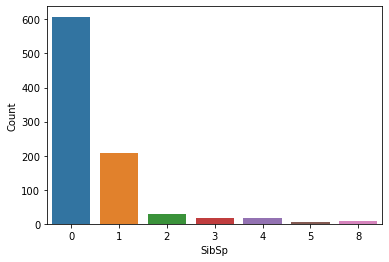

In [14]:
sns.countplot(x='SibSp',data=train_df)
plt.ylabel('Count')
plt.show()

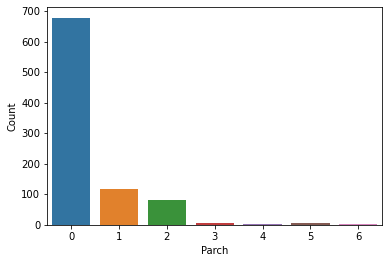

In [15]:
sns.countplot(x='Parch',data=train_df)
plt.ylabel('Count')
plt.show()

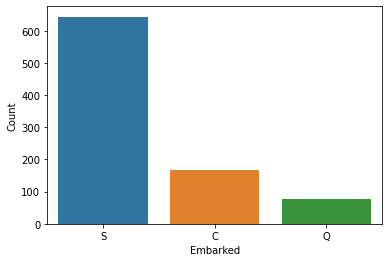

In [16]:
sns.countplot(x='Embarked',data=train_df)
plt.ylabel('Count')
plt.show()

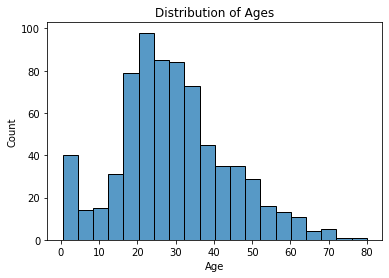

In [18]:
sns.histplot(x='Age',data=train_df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

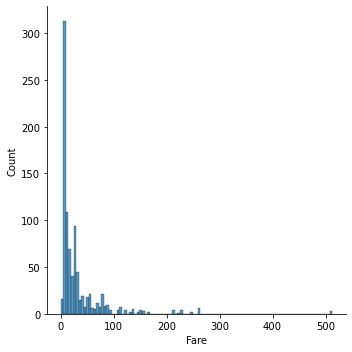

In [20]:
sns.displot(x='Fare',data=train_df)
plt.ylabel('Count')
plt.show()

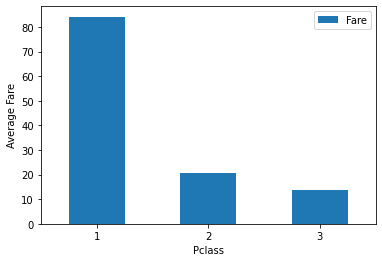

In [21]:
class_fare = train_df.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

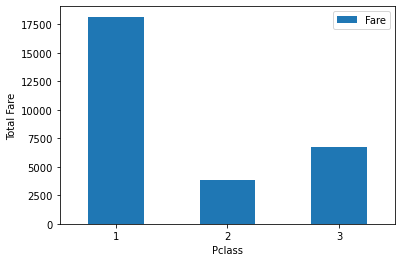

In [22]:
class_fare = train_df.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

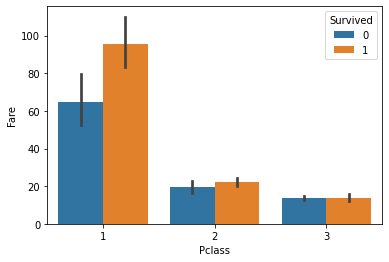

In [23]:
sns.barplot(data=train_df,x='Pclass',y='Fare',hue='Survived')
plt.show()

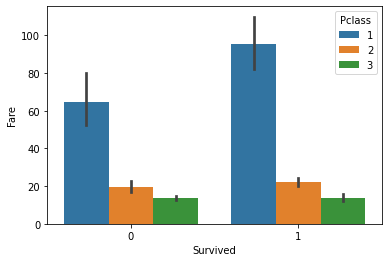

In [24]:
sns.barplot(data=train_df,x='Survived',y='Fare',hue='Pclass')
plt.show()

# Data Preprocessing

In [25]:
train_len=len(train_df)
df = pd.concat([train_df,test_df],axis=0)
df = df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Check for Null Values

In [26]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [27]:
df = df.drop(columns=['Cabin'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Filling Missing Values

In [29]:
df['Age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64>

In [30]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [31]:
df['Embarked'].mode()[0]

'S'

In [32]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Log transformation for uniform data distribution

<AxesSubplot:xlabel='Fare', ylabel='Density'>

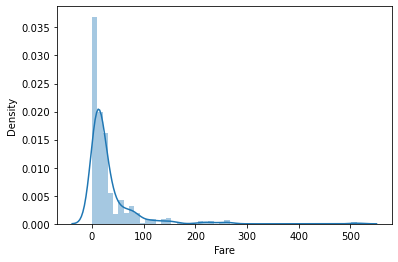

In [33]:
sns.distplot(train_df['Fare'])

In [34]:
train_df['Fare'] = np.log(train_df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

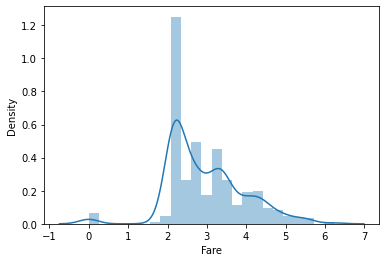

In [35]:
sns.distplot(train_df['Fare'])

# Correlation Matrix

<AxesSubplot:>

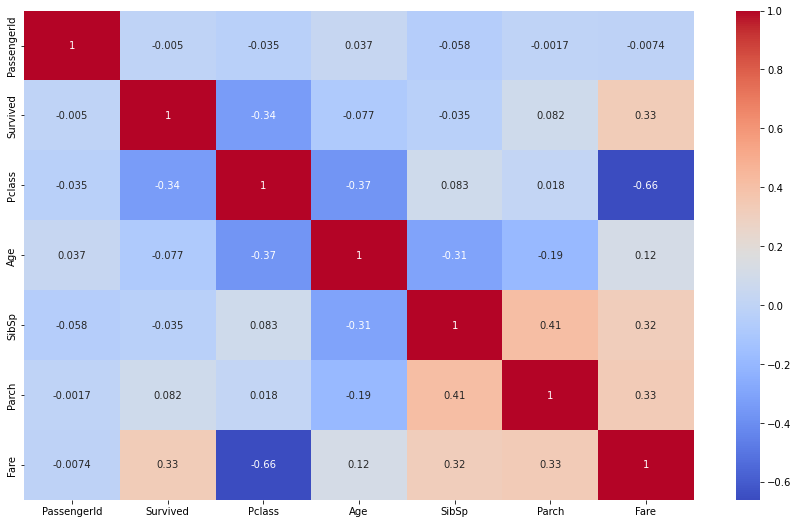

In [36]:
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
subset_df = train_df[numeric_columns]

corr_matrix = subset_df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Drop Unnecessary Columns

In [38]:
df = df.drop(['Name','Ticket'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,7.2500,S
1,2,1.0,1,female,38.000000,1,0,71.2833,C
2,3,1.0,3,female,26.000000,0,0,7.9250,S
3,4,1.0,1,female,35.000000,1,0,53.1000,S
4,5,0.0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,8.0500,S
1305,1306,NaN,1,female,39.000000,0,0,108.9000,C
1306,1307,NaN,3,male,38.500000,0,0,7.2500,S
1307,1308,NaN,3,male,29.881138,0,0,8.0500,S


In [39]:
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

# Splitting Dataset

In [40]:
train=df.iloc[:train_len:]
test=df.iloc[train_len:,:]

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1


In [42]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
891,892,NaN,3,34.5,0,0,7.8292,1,1,0
892,893,NaN,3,47.0,1,0,7.0000,0,0,1
893,894,NaN,2,62.0,0,0,9.6875,1,1,0
894,895,NaN,3,27.0,0,0,8.6625,1,0,1
895,896,NaN,3,22.0,1,1,12.2875,0,0,1


# Train-Test Split

In [43]:
x = df.drop(columns=['PassengerId','Survived'],axis=1)
y = train['Survived']

In [44]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [45]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [46]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.000000,1,0,7.2500,1,0,1
1,2,1.0,1,38.000000,1,0,71.2833,0,0,0
2,3,1.0,3,26.000000,0,0,7.9250,0,0,1
3,4,1.0,1,35.000000,1,0,53.1000,0,0,1
4,5,0.0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.881138,0,0,8.0500,1,0,1
1305,1306,NaN,1,39.000000,0,0,108.9000,0,0,0
1306,1307,NaN,3,38.500000,0,0,7.2500,1,0,1
1307,1308,NaN,3,29.881138,0,0,8.0500,1,0,1


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
       train.drop(['Survived','PassengerId'],axis=1),
       train['Survived'],
       test_size=0.2,
       random_state=42)

In [48]:
x_train.shape

(712, 8)

In [49]:
x_test.shape

(179, 8)

In [50]:
y_test.shape

(179,)

In [51]:
y_train.shape

(712,)

# Model Evaluation

# 1) Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [53]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

# Logistic Regression Model Evaluation

In [54]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)

In [55]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749


# 2) Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()

In [57]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

# Decision tree model evaluation

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)

In [59]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749


# 3) Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

In [61]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

# Random Forest model evaluation

In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)

In [63]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7932960893854749
